In [18]:
from sys import prefix
import pandas as pd
import random
import os
import shutil
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import math

def get_data(result1 = 'results', result2 = ''):
    sat_num = [[0 for i in range(100)] for i in range(5)]
    total_time = [[0 for i in range(100)] for i in range(5)]
    clash_num = [[0 for i in range(100)] for i in range(5)]
    num = 0
    for result in tqdm(os.listdir(result1)):
        num += 1
        result_path = os.path.join(result1, result)
        category_list = os.listdir(result_path)
        for category in category_list:
            category_path = os.path.join(result_path, category)
            file_list = os.listdir(category_path)
            for file in file_list:
                path = os.path.join(category_path, file)
                with open(path) as f:
                    # try:
                    while f.readline():
                        info = f.readline()[:-1]
                        # print(result, '-', info)
                        if 'find answer' in info:
                            if '36x36_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('36x36_50_')[-1].split('.')[0])
                                sat_num[0][index] += 1
                                total_time[0][index] += time
                            elif '49x49_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('49x49_50_')[-1].split('.')[0])
                                sat_num[1][index] += 1
                                total_time[1][index] += time
                            elif '64x64_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('64x64_50_')[-1].split('.')[0])
                                sat_num[2][index] += 1
                                total_time[2][index] += time
                            elif '64x64_60' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('64x64_60_')[-1].split('.')[0])
                                sat_num[3][index] += 1
                                total_time[3][index] += time 
                            elif '81x81_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('81x81_50_')[-1].split('.')[0])
                                sat_num[4][index] += 1
                                total_time[4][index] += time   
                        else:
                            clash = int(info.split(': ')[-1])
                            info = f.readline()
                            if '36x36_50' in info:
                                index = int(info.split('36x36_50_')[-1].split('.')[0])
                                total_time[0][index] += 1000
                                clash_num[0][index] += clash
                            elif '49x49_50' in info:
                                index = int(info.split('49x49_50_')[-1].split('.')[0])
                                total_time[1][index] += 1000
                                clash_num[1][index] += clash
                            elif '64x64_50' in info:
                                index = int(info.split('64x64_50_')[-1].split('.')[0])
                                total_time[2][index] += 1000
                                clash_num[2][index] += clash
                            elif '64x64_60' in info:
                                index = int(info.split('64x64_60_')[-1].split('.')[0])
                                total_time[3][index] += 1000 
                                clash_num[3][index] += clash
                            elif '81x81_50' in info:
                                index = int(info.split('81x81_50_')[-1].split('.')[0])
                                total_time[4][index] += 1000 
                                clash_num[4][index] += clash

    time1 = [x/num for a in total_time for x in a]
    
    sat_num = [[0 for i in range(100)] for i in range(5)]
    total_time = [[0 for i in range(100)] for i in range(5)]
    clash_num = [[0 for i in range(100)] for i in range(5)]
    num = 0
    for result in tqdm(os.listdir(result2)):
        num += 1
        result_path = os.path.join(result2, result)
        category_list = os.listdir(result_path)
        for category in category_list:
            category_path = os.path.join(result_path, category)
            file_list = os.listdir(category_path)
            for file in file_list:
                path = os.path.join(category_path, file)
                with open(path) as f:
                    # try:
                    while f.readline():
                        info = f.readline()[:-1]
                        # print(result, '-', info)
                        if 'find answer' in info:
                            if '36x36_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('36x36_50_')[-1].split('.')[0])
                                sat_num[0][index] += 1
                                total_time[0][index] += time
                            elif '49x49_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('49x49_50_')[-1].split('.')[0])
                                sat_num[1][index] += 1
                                total_time[1][index] += time
                            elif '64x64_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('64x64_50_')[-1].split('.')[0])
                                sat_num[2][index] += 1
                                total_time[2][index] += time
                            elif '64x64_60' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('64x64_60_')[-1].split('.')[0])
                                sat_num[3][index] += 1
                                total_time[3][index] += time
                            elif '81x81_50' in info:
                                time = float(info.split(': ')[-1])
                                info = f.readline()
                                index = int(info.split('81x81_50_')[-1].split('.')[0])
                                sat_num[4][index] += 1
                                total_time[4][index] += time         
                        else:
                            # clash = int(info.split(': ')[-1])
                            if result2 == 'Sudoku-LS2' or 'run.sh' in info:
                                info = f.readline()[:-1]
                            if '36x36_50' in info:
                                index = int(info.split('36x36_50_')[-1].split('.')[0])
                                time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                                # print(index, "-", time)
                                if time < 1000:
                                    total_time[0][index] += time
                                else:
                                    total_time[0][index] += 1000
                            elif '49x49_50' in info:
                                index = int(info.split('49x49_50_')[-1].split('.')[0])
                                time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                                if time < 1000:
                                    total_time[1][index] += time
                                else:
                                    total_time[1][index] += 1000
                            elif '64x64_50' in info:
                                index = int(info.split('64x64_50_')[-1].split('.')[0])
                                time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                                if time < 1000:
                                    total_time[2][index] += time
                                else:
                                    total_time[2][index] += 1000
                            elif '64x64_60' in info:
                                index = int(info.split('64x64_60_')[-1].split('.')[0])
                                time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                                if time < 1000:
                                    total_time[3][index] += time
                                else:
                                    total_time[3][index] += 1000
                            elif '81x81_50' in info:
                                index = int(info.split('81x81_50_')[-1].split('.')[0])
                                time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                                if time < 1000:
                                    total_time[4][index] += time
                                else:
                                    total_time[4][index] += 1000
                                
    time2 = [x/num for a in total_time for x in a]

    X = [[], []]
    Y = [[], []]
    for x, y in zip(time1, time2):
        if x < 1000 and y < 1000 and x > 0 and y > 0:
            X[0].append(x)
            X[1].append(y)
            # if result2 == 'Sudoku-LS3' and x/y > 2:
            #     if x/y > 6:
            #         X[1].append(y*6)
            #     elif x/y > 4:
            #         X[1].append(y*4)
            #     else:
            #         X[1].append(y*2)
                
            # else:
                # X[1].append(y)
        else:
            if x == 0 or y == 0:
                x = 1000
                y = 1000
            Y[0].append(x)
            Y[1].append(y)
    print(len(X[0]))
    print(len(Y[0]))
    return X, Y

In [19]:
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import sys

def get_compare(a, b, type='log'):
    # 生成数据
    X, Y = get_data(a, b)

    # 生成图形
    plt.figure(figsize=(5.3, 5.3))
    
    plt.scatter(X[0], X[1], s=1, c='purple', marker="x", linewidth=5, alpha=0.4)
    plt.scatter(Y[0], Y[1], s=1, c='peru', marker="x", linewidth=5, alpha=0.6)
    x = [i for i in range(0, 1200)]
    plt.plot(x, x, c='black', linewidth=0.5)

    # 显示图形
    plt.xlabel(a.upper() + ' (s)') # 横坐标轴的标题
    plt.ylabel(b.upper() + ' (s)') # 纵坐标轴的标题
    
    if type == 'log':
        plt.xlim(1, 1200)
        plt.ylim(1, 1200)
        plt.xscale('symlog')
        plt.yscale('symlog')
        plt.axhline(y=10,ls=":",c="gray")
        plt.axhline(y=100,ls=":",c="gray")
        
        plt.axvline(x=10,ls=":",c="gray")
        plt.axvline(x=100,ls=":",c="gray")
    else:
        plt.xlim(1, 1020)
        plt.ylim(1, 1020)
        plt.axhline(y=200,ls=":",c="gray")
        plt.axhline(y=400,ls=":",c="gray")
        plt.axhline(y=600,ls=":",c="gray")
        plt.axhline(y=800,ls=":",c="gray")
        # plt.axhline(y=1000,ls=":",c="gray")
        
        plt.axvline(x=200,ls=":",c="gray")
        plt.axvline(x=400,ls=":",c="gray")
        plt.axvline(x=600,ls=":",c="gray")
        plt.axvline(x=800,ls=":",c="gray")
        # plt.axvline(x=1000,ls=":",c="gray")

    if type == 'log':
        plt.savefig('./charts/'+a.upper() + '_VS_' + b.upper() + '(log)' +'.pdf')
    else:
        plt.savefig('./charts/'+a.upper() + '_VS_' + b.upper() + '.pdf')
    plt.show()
    # plt.close()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

282
218


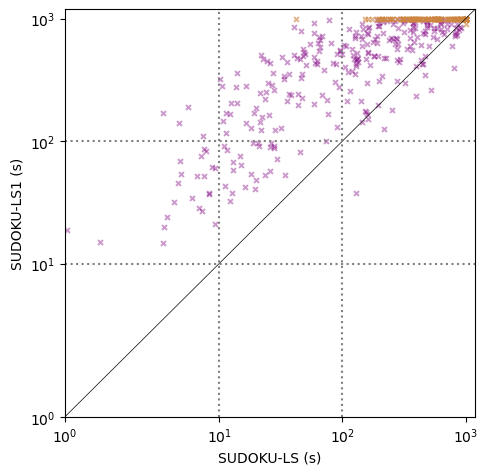

In [20]:
get_compare('Sudoku-LS', 'Sudoku-LS1', type='log')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

282
218


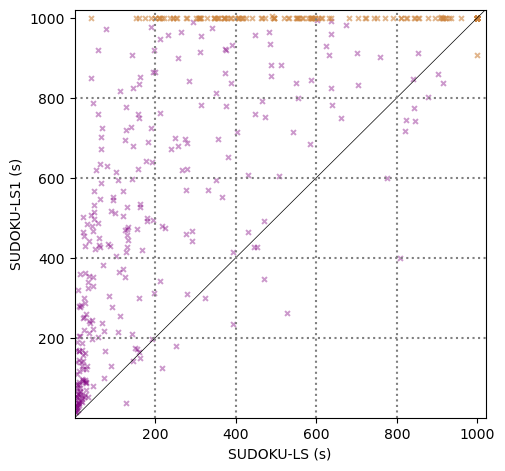

In [21]:
get_compare('Sudoku-LS', 'Sudoku-LS1', type='none')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

390
110


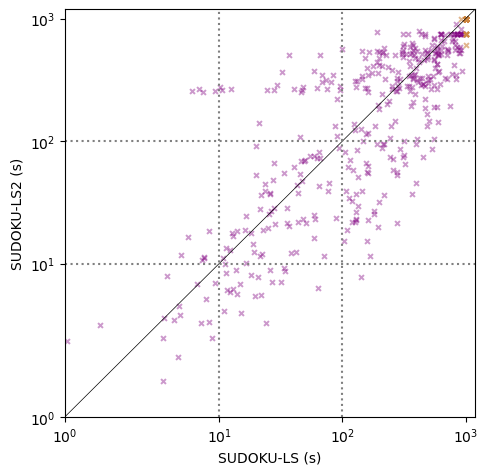

In [22]:
get_compare('Sudoku-LS', 'Sudoku-LS2', type='log')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

390
110


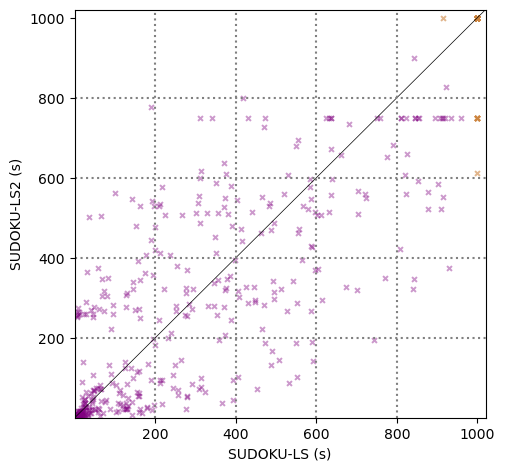

In [23]:
get_compare('Sudoku-LS', 'Sudoku-LS2', type='none')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

261
239


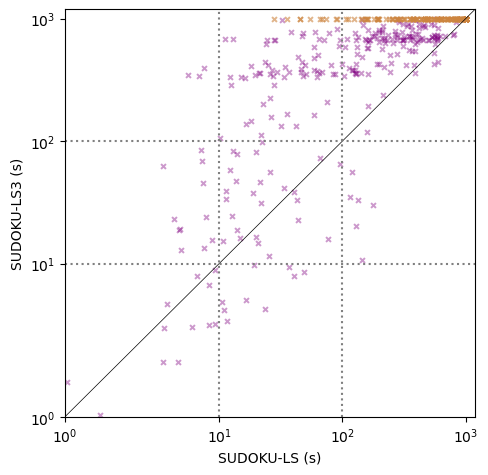

In [24]:
get_compare('Sudoku-LS', 'Sudoku-LS3', type='log')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

261
239


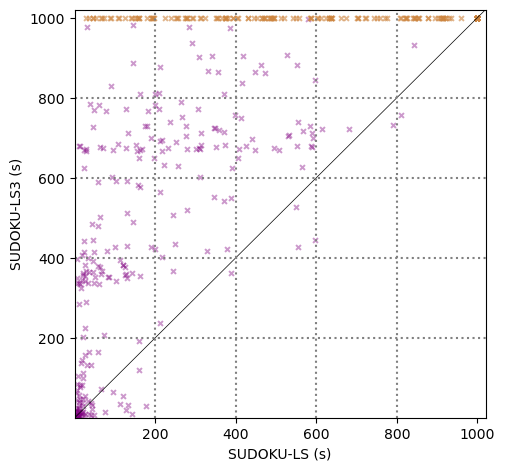

In [25]:
get_compare('Sudoku-LS', 'Sudoku-LS3', type='none')